## Dataset

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, text, labels):
            self.labels = labels
            self.data = text

    def __len__(self):
            return len(self.labels)

    def __getitem__(self, idx):
            label = self.labels[idx]
            text = self.data[idx]
            sample = {"Text": text, "Class": label}
            return sample

In [8]:
text = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']
MyDataset = CustomDataset(text, labels)

In [9]:
type(MyDataset)

__main__.CustomDataset

In [12]:
MyDataLoader = DataLoader(MyDataset, batch_size=2, shuffle=True)
next(iter(MyDataLoader))

{'Class': ['Positive', 'Negative'], 'Text': ['Amazing', 'Sad']}

In [14]:
MyDataLoader = DataLoader(MyDataset, batch_size=3, shuffle=True)
for dataset in MyDataLoader:
    print(dataset)

{'Text': ['Happy', 'Glum', 'Amazing'], 'Class': ['Positive', 'Negative', 'Positive']}
{'Text': ['Sad', 'Unhapy'], 'Class': ['Negative', 'Negative']}


## Custom Dataset

In [15]:
from torchvision.datasets import VisionDataset
from typing import Any, Callable, Dict, List, Optional, Tuple
import os

from tqdm import tqdm
import os
import sys
from pathlib import Path
import requests

from skimage import io, transform
import matplotlib.pyplot as plt


In [16]:

import tarfile

    
class NotMNIST(VisionDataset):
    resource_url = 'http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz'
    
    def __init__(
            self,
            root: str,
            train: bool = True,
            transform: Optional[Callable] = None,
            target_transform: Optional[Callable] = None,
            download: bool = False,
    ) -> None:
        super(NotMNIST, self).__init__(root, transform=transform,
                                    target_transform=target_transform)

        if not self._check_exists() or download:
            self.download()
            
        self.data, self.targets = self._load_data()
        

    def __len__(self):
        return len(self.data)

    
    def __getitem__(self, index):
        image_name = self.data[index]
        image = io.imread(image_name)
        label = self.targets[index]
        if self.transform:
            image = self.transform(image)
        return image, label

    def _load_data(self):
        filepath = self.image_folder
        data = []
        targets = []
        
        for target in os.listdir(filepath):
            filenames = [os.path.abspath(
                os.path.join(filepath, target, x)) for x in os.listdir(
                os.path.join(filepath, target))]
            
            targets.extend([target] * len(filenames))
            data.extend(filenames)
        return data, targets

    @property
    def raw_folder(self) -> str:
        return os.path.join(self.root, self.__class__.__name__, 'raw')

    @property
    def image_folder(self) -> str:
        return os.path.join(self.root, 'notMNIST_large')


    def download(self) -> None:
        os.makedirs(self.raw_folder, exist_ok=True)
        fname = self.resource_url.split("/")[-1]
        chunk_size = 1024
        
        filesize = int(requests.head(self.resource_url).headers["Content-Length"])
        
        with requests.get(self.resource_url, stream=True) as r, open(
            os.path.join(self.raw_folder, fname), "wb") as f, tqdm(
            unit="B",  # unit string to be displayed.
            unit_scale=True,  # let tqdm to determine the scale in kilo, mega..etc.
            unit_divisor=1024,  # is used when unit_scale is true
            total=filesize,  # the total iteration.
            file=sys.stdout,  # default goes to stderr, this is the display on console.
            desc=fname  # prefix to be displayed on progress bar.
        ) as progress:
            for chunk in r.iter_content(chunk_size=chunk_size):
                # download the file chunk by chunk
                datasize = f.write(chunk)
                # on each chunk update the progress bar.
                progress.update(datasize)
        
        self._extract_file(os.path.join(self.raw_folder, fname), target_path=self.root)
        
    def _extract_file(self, fname, target_path) -> None:
        if fname.endswith("tar.gz"):
            tag = "r:gz"
        elif fname.endswith("tar"):
            tag = "r:"
        tar = tarfile.open(fname, tag)
        tar.extractall(path=target_path)
        tar.close()
    
    def _check_exists(self) -> bool:
        return os.path.exists(self.raw_folder)
        

In [17]:
dataset = NotMNIST("data", download=True)

notMNIST_large.tar.gz: 100%|██████████| 236M/236M [00:06<00:00, 40.7MB/s]
notMNIST_large.tar.gz: 100%|██████████| 236M/236M [00:05<00:00, 41.3MB/s]


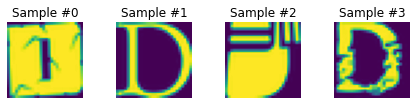

In [18]:
fig = plt.figure()

for i in range(8):
    sample = dataset[i]

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample[0])

    if i == 3:
        plt.show()
        break

In [ ]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

dataset = NotMNIST("data", download=False)



In [19]:
dataset_loader = torch.utils.data.DataLoader(dataset,
                                             batch_size=128, shuffle=True)

In [20]:
train_features, train_labels = next(iter(dataset_loader))


In [23]:
train_features.shape

torch.Size([128, 28, 28])

In [26]:
train_labels

('D',
 'G',
 'E',
 'G',
 'F',
 'F',
 'I',
 'B',
 'B',
 'D',
 'E',
 'E',
 'A',
 'B',
 'C',
 'A',
 'G',
 'G',
 'G',
 'F',
 'C',
 'D',
 'C',
 'D',
 'H',
 'H',
 'J',
 'H',
 'E',
 'C',
 'I',
 'F',
 'D',
 'D',
 'A',
 'G',
 'J',
 'F',
 'B',
 'G',
 'A',
 'C',
 'E',
 'D',
 'I',
 'G',
 'H',
 'H',
 'B',
 'D',
 'A',
 'H',
 'J',
 'A',
 'F',
 'H',
 'J',
 'B',
 'J',
 'C',
 'A',
 'G',
 'F',
 'I',
 'I',
 'G',
 'A',
 'E',
 'E',
 'E',
 'C',
 'B',
 'C',
 'F',
 'C',
 'B',
 'D',
 'B',
 'G',
 'J',
 'J',
 'D',
 'B',
 'F',
 'G',
 'B',
 'F',
 'F',
 'C',
 'I',
 'H',
 'G',
 'H',
 'H',
 'I',
 'E',
 'A',
 'H',
 'I',
 'E',
 'E',
 'G',
 'F',
 'I',
 'F',
 'J',
 'D',
 'B',
 'B',
 'G',
 'H',
 'D',
 'E',
 'J',
 'F',
 'E',
 'E',
 'J',
 'A',
 'C',
 'I',
 'A',
 'C',
 'J',
 'D',
 'E',
 'J',
 'A')

In [ ]:
train_features.shape

torch.Size([128, 28, 28])